<a href="https://colab.research.google.com/github/timlongfield/Snapchat_Filters/blob/main/vision_final_face_warp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import cv2
import numpy as np
import math
import imageio
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow# https://subscription.packtpub.com/book/application-development/9781785283932/1/ch01lvl1sec16/image-warping

In [190]:
!wget https://i.postimg.cc/XNCmwyM2/IMG-2959.jpg -O jax.png
!wget https://i.postimg.cc/FK8c3NT5/Photo-on-12-19-21-at-3-52-PM.jpg -O tim.png

--2021-12-20 19:35:55--  https://i.postimg.cc/XNCmwyM2/IMG-2959.jpg
Resolving i.postimg.cc (i.postimg.cc)... 172.93.106.42
Connecting to i.postimg.cc (i.postimg.cc)|172.93.106.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96512 (94K) [image/jpeg]
Saving to: ‘jax.png’

jax.png             100%[===================>]  94.25K  --.-KB/s    in 0.04s   

2021-12-20 19:35:55 (2.06 MB/s) - ‘jax.png’ saved [96512/96512]

--2021-12-20 19:35:55--  https://i.postimg.cc/FK8c3NT5/Photo-on-12-19-21-at-3-52-PM.jpg
Resolving i.postimg.cc (i.postimg.cc)... 172.93.106.42
Connecting to i.postimg.cc (i.postimg.cc)|172.93.106.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12320 (12K) [image/jpeg]
Saving to: ‘tim.png’

tim.png             100%[===================>]  12.03K  --.-KB/s    in 0.001s  

2021-12-20 19:35:55 (9.11 MB/s) - ‘tim.png’ saved [12320/12320]



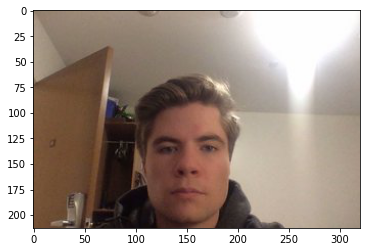

In [191]:
frame = imageio.imread('tim.png') 
frame2 = imageio.imread('jax.png') 
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
plt.imshow(frame)

In [192]:
rows, cols = img.shape
rows2, cols2 = img2.shape
print(img.shape)
print(img2.shape)

(213, 320)
(800, 424)


In [193]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [200]:
# convert img to grayscale for face detection
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# detect faces from gray_frame
faces = face_cascade.detectMultiScale(gray_frame, 1.3, 5)

In [201]:
print("Num faces found:", len(faces))
print("Face (x,y,w,h):", faces)

Num faces found: 1
Face (x,y,w,h): [[103  96  95  95]]


In [202]:
# initialize faces
angry_face = np.zeros(img.shape, dtype=img.dtype)
bored_face = np.zeros(img.shape, dtype=img.dtype)
side_wave = np.zeros(img2.shape, dtype=img.dtype)

Only face warped (angry):


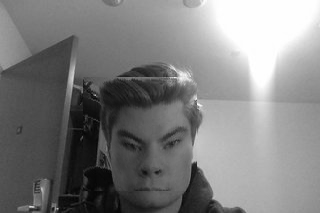

Only face warped (bored):


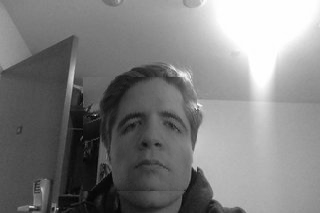

Full image wave:


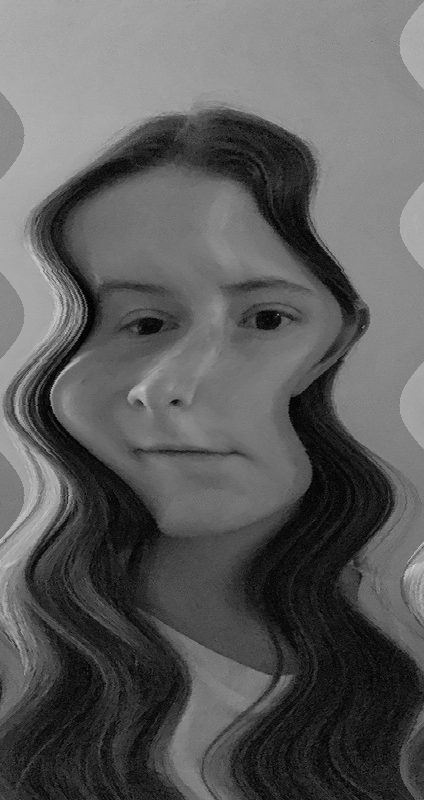

In [204]:
# iterate through pixels and warp with wave effect inside the face box (for angry and bored), but copy over from img outside the box
for (x, y, w, h) in faces:

        # increase face box by 20% to create smoother final image
        x, y, w, h = x - (.2 * x), y - (.2 * y), w + (.2 * w), h + (.2 * h)

        ## Angry Face
        for i in range(rows):
          for j in range(cols):
                x_wave = int(0.0 * math.sin(2 * math.pi * i / 150)) # controls horizontal wave
                y_wave = int(-15.0 * math.cos(2 * math.pi * j / 150)) # controls vertical wave
                if i + y_wave < rows and (i > y and i < y + h) and (j > x and j < x + w):
                    angry_face[i,j] = img[(i + y_wave) % rows, (j + x_wave) % cols]
                else:
                    angry_face[i,j] = img[i,j]

        ## Bored Face
        # repeat loop for different wave scalar values (+15 instead of -15 for y_wave)
        for i in range(rows):
          for j in range(cols):
                x_wave = int(0.0 * math.sin(2 * math.pi * i / 150)) # controls horizontal wave
                y_wave = int(15.0 * math.cos(2 * math.pi * j / 150)) # controls vertical wave
                if i + y_wave < rows and (i > y and i < y + h) and (j > x and j < x + w):
                    bored_face[i,j] = img[(i + y_wave) % rows, (j + x_wave) % cols]
                else:
                    bored_face[i,j] = img[i,j]

        ## Side Wave Effect
        # create wave effect across all pixels in image ignoring face box
        for i in range(rows2):
          for j in range(cols2):
            offset_x = int(25.0 * math.sin(2 * math.pi * i / 180))
            offset_y = 0
            if j + offset_x < rows2:
                side_wave[i,j] = img2[i, (j + offset_x) % cols2]
            else:
                side_wave[i,j] = 0

        print("Only face warped (angry):")
        cv2_imshow(angry_face)
        print("Only face warped (bored):")
        cv2_imshow(bored_face)
        print("Full image wave:")
        cv2_imshow(side_wave)
